# Bike Share Data Analysis 2024

This notebook analyzes the 2024 Chicago Divvy bikeshare dataset.
The main objectives are :

*   To understand user behaviour patterns (member vs casual riders)
*   To identify monthly, daily, and hourly trends in bike usage
*   To explore trip duration and seasonal effects
*   To prepare summary datasets for visualitation in Tableau


Import library

For this analysis, we made use of the Python libraries Pandas, Matplotlib and Seaborn


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## 1. Data Loading and Merging

We load the monthly bikeshare CSV files for the year 2024 and merge them into a single dataframe for analysis.

In [2]:
Jan = pd.read_csv('/content/202401-divvy-tripdata.csv')
Feb = pd.read_csv('/content/202402-divvy-tripdata.csv')
Mar = pd.read_csv('/content/202403-divvy-tripdata.csv')
Apr = pd.read_csv('/content/202404-divvy-tripdata.csv')
May = pd.read_csv('/content/202405-divvy-tripdata.csv')
Jun = pd.read_csv('/content/202406-divvy-tripdata.csv')
Jul = pd.read_csv('/content/202407-divvy-tripdata.csv')
Aug = pd.read_csv('/content/202408-divvy-tripdata.csv')
Sep = pd.read_csv('/content/202409-divvy-tripdata.csv')
Oct = pd.read_csv('/content/202410-divvy-tripdata.csv')
Nov = pd.read_csv('/content/202411-divvy-tripdata.csv')
Dec = pd.read_csv('/content/202412-divvy-tripdata.csv')

Check file size to ensure it is not corrupted during upload

In [3]:
ls -lh /content/202401-divvy-tripdata.csv


-rw-r--r-- 1 root root 29M Sep 25 14:51 /content/202401-divvy-tripdata.csv


Merge all dataframe into single dataframe

In [4]:
df_all = pd.concat([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec], ignore_index=True)
df_all.size

76187384

In [5]:
df_all.shape

(5860568, 13)

## 2. Data Cleaning

Before proceeding, we check:
- Duplicates and removes them
- Missing values and drop rows with critical nulls ('end_lat', 'end_lng')
- Standarize datetime formats ('started_at', 'ended_at')

Check duplicates

In [6]:
df_all[df_all.duplicated()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


Remove duplicates

In [7]:
print("Before :", df_all.shape )
df_all=df_all.drop_duplicates()
print("After :", df_all.shape)

Before : (5860568, 13)
After : (5860568, 13)


Check missing values

In [8]:
df_all.isnull().sum()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,1073951
start_station_id,1073951
end_station_name,1104653
end_station_id,1104653
start_lat,0
start_lng,0


Drop rows of missing values

In [9]:
print("Before_delete :", len(df_all))
df_clean = df_all.dropna(subset=['end_lat', 'end_lng'])
print("After_delete :", len(df_clean))

Before_delete : 5860568
After_delete : 5853336


Convert 'started_at' and 'ended_at' columns into datetime objects.

In [10]:
df_clean = df_clean.copy()

df_clean['started_at'] = df_clean['started_at'].astype(str).str.replace(r'\.\d+', '', regex=True)
df_clean['ended_at'] = df_clean['ended_at'].astype(str).str.replace(r'\.\d+', '', regex=True)

df_clean['started_at'] = pd.to_datetime(df_clean['started_at'], errors='coerce')
df_clean['ended_at'] = pd.to_datetime(df_clean['ended_at'], errors='coerce')

In [11]:
df_clean.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903267,-87.634737,41.889177,-87.638506,member
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902937,-87.634440,41.889177,-87.638506,member
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902951,-87.634470,41.889177,-87.638506,member
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.884295,-87.633963,41.921822,-87.644140,member
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.948797,-87.675278,41.889177,-87.638506,member
5,C96080812CD285C5,classic_bike,2024-01-07 11:21:24,2024-01-07 11:30:03,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903222,-87.634324,41.889177,-87.638506,member
6,0EA7CB313D4F456A,classic_bike,2024-01-05 14:44:12,2024-01-05 14:53:06,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903222,-87.634324,41.889177,-87.638506,member
7,EE11F3A3B39CFBD8,electric_bike,2024-01-04 18:19:53,2024-01-04 18:28:04,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903368,-87.634861,41.889177,-87.638506,member
8,63E83DE8E3279F15,classic_bike,2024-01-01 14:46:53,2024-01-01 14:57:02,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903222,-87.634324,41.889177,-87.638506,member
9,8005682869122D93,electric_bike,2024-01-03 19:31:08,2024-01-03 19:40:05,Clark St & Ida B Wells Dr,TA1305000009,Kingsbury St & Kinzie St,KA1503000043,41.876033,-87.630866,41.889177,-87.638506,member


## 3. Feature Engineering

We Create additional columns:
*  'duration_min' ➡ trip duration in minutes
*  'day_of_week' ➡ weekday names
*  'month', 'day', 'hour' ➡ extracted from start time
*  'season' ➡ grouped by month





In [12]:
df_clean['duration_min'] = (df_clean['ended_at'] - df_clean['started_at']).dt.total_seconds() / 60
df_clean['day_of_week'] = df_clean['started_at'].dt.day_name()
df_clean['hour'] = df_clean['started_at'].dt.hour
df_clean['month'] = df_clean['started_at'].dt.month_name()

In [13]:
df_clean.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_min,day_of_week,hour,month
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903267,-87.634737,41.889177,-87.638506,member,7.533333,Friday,15,January
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902937,-87.634440,41.889177,-87.638506,member,7.216667,Monday,15,January
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902951,-87.634470,41.889177,-87.638506,member,8.000000,Saturday,12,January
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.884295,-87.633963,41.921822,-87.644140,member,29.816667,Monday,16,January
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.948797,-87.675278,41.889177,-87.638506,member,26.200000,Wednesday,5,January
5,C96080812CD285C5,classic_bike,2024-01-07 11:21:24,2024-01-07 11:30:03,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903222,-87.634324,41.889177,-87.638506,member,8.650000,Sunday,11,January
6,0EA7CB313D4F456A,classic_bike,2024-01-05 14:44:12,2024-01-05 14:53:06,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903222,-87.634324,41.889177,-87.638506,member,8.900000,Friday,14,January
7,EE11F3A3B39CFBD8,electric_bike,2024-01-04 18:19:53,2024-01-04 18:28:04,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903368,-87.634861,41.889177,-87.638506,member,8.183333,Thursday,18,January
8,63E83DE8E3279F15,classic_bike,2024-01-01 14:46:53,2024-01-01 14:57:02,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903222,-87.634324,41.889177,-87.638506,member,10.150000,Monday,14,January
9,8005682869122D93,electric_bike,2024-01-03 19:31:08,2024-01-03 19:40:05,Clark St & Ida B Wells Dr,TA1305000009,Kingsbury St & Kinzie St,KA1503000043,41.876033,-87.630866,41.889177,-87.638506,member,8.950000,Wednesday,19,January


In [14]:
df_clean.shape

(5853336, 17)

## 4. Monthly Trends

We analyze the total trips per month to identify seasonal usage patterns.
**Key insight**: Bike usage peaks in the summer months (June-September) and decreases in winter.

In [15]:
print("Total Trips:", len(df_clean))
print("Average duration (minute):", df_clean['duration_min'].mean())
print("Median duration (minute):", df_clean['duration_min'].median())
print(df_clean['member_casual'].value_counts())

Total Trips: 5853336
Average duration (minute): 15.483907080224563
Median duration (minute): 9.7
member_casual
member    3707559
casual    2145777
Name: count, dtype: int64


In [16]:
month_order = [
    "January", "February", "March",
    "April", "May", "June", "July",
    "August", "September", "October",
    "November", "December"
]

df_clean['month'] = pd.Categorical(
    df_clean['month'],
    categories=month_order,
    ordered=True
)

trips_per_month_trend = df_clean.groupby('month', observed=False).size().reset_index(name='total_trips')

print(trips_per_month_trend)

        month  total_trips
0     January       144585
1    February       222846
2       March       301291
3       April       414546
4         May       608880
5        June       709606
6        July       747867
7      August       754826
8   September       820164
9     October       615715
10   November       334777
11   December       178233


 Trend Trips per Month Line Chart

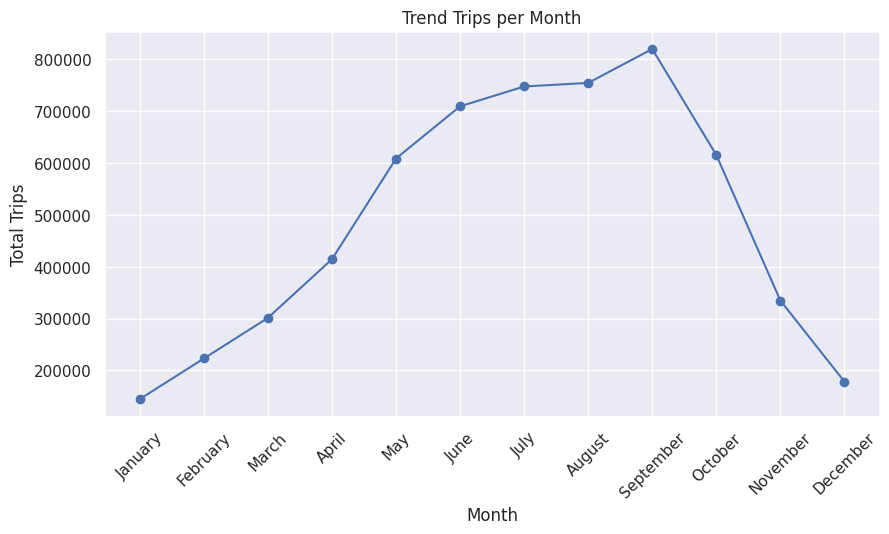

In [17]:
plt.figure(figsize=(10,5))
plt.plot(trips_per_month_trend['month'], trips_per_month_trend['total_trips'], marker='o')

plt.title("Trend Trips per Month")
plt.xlabel("Month")
plt.ylabel("Total Trips")
plt.xticks(rotation=45)
plt.grid(True)

plt.savefig("trend_trips_per_month.png", dpi=300, bbox_inches='tight')

plt.show()


Trips per month from highest to lowest

In [18]:
trips_per_month = df_clean.groupby('month', observed=False).size().sort_values(ascending=False)
print(trips_per_month)

month
September    820164
August       754826
July         747867
June         709606
October      615715
May          608880
April        414546
November     334777
March        301291
February     222846
December     178233
January      144585
dtype: int64


Trips per Month Bar Chart

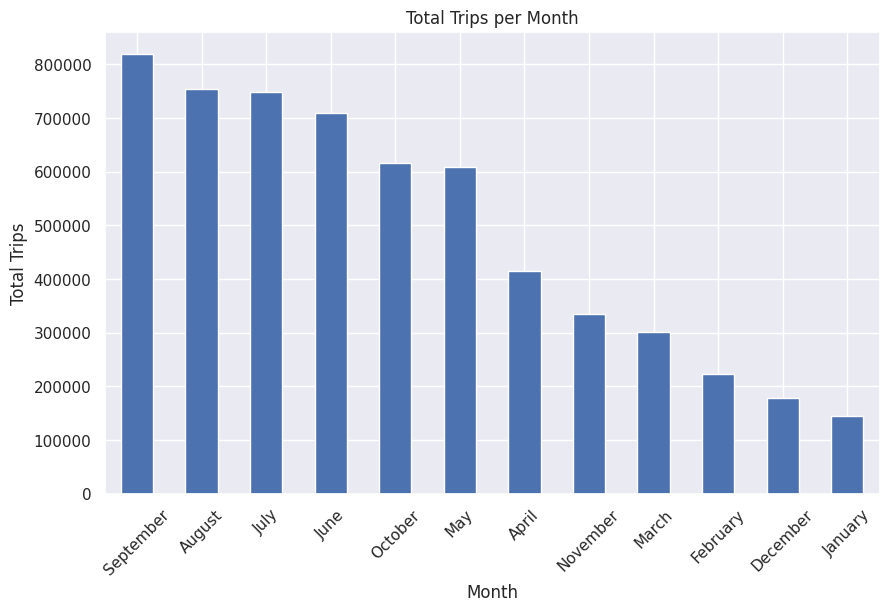

In [28]:
trips_per_month.plot(kind='bar', figsize=(10,6), title = "Total Trips per Month")
plt.ylabel("Total Trips")
plt.xlabel('Month')
plt.xticks(rotation=45)

plt.savefig("total_trips_per_month.png", dpi=300, bbox_inches='tight')
plt.show()

## 5. Daily and Weekly Patterns

We explore:
-  Daily Distribution of trips
-  Usage by day of the week
**Key insight**: Weekends tend to show higher casual usage, while weekdays are dominated by members



day_of_week
Monday       787368
Tuesday      802332
Wednesday    878752
Thursday     834858
Friday       840634
Saturday     923643
Sunday       785749
Name: count, dtype: int64


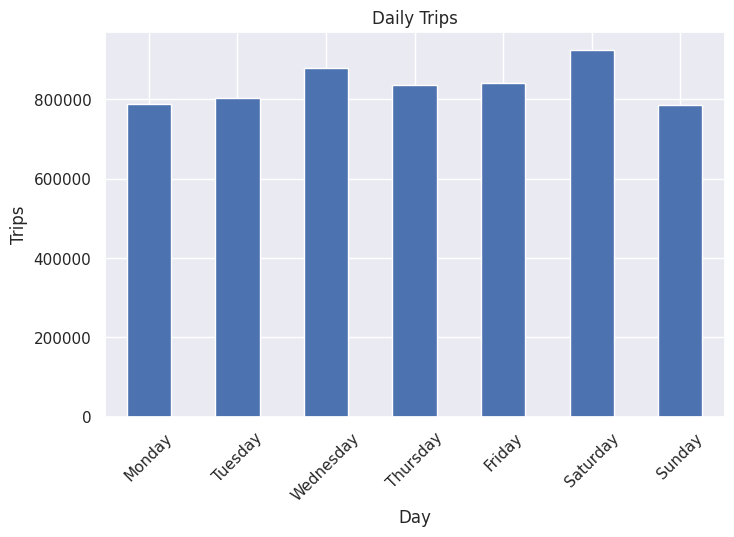

In [29]:
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trips_per_day = df_clean['day_of_week'].value_counts().reindex(order_days)
print(trips_per_day)

trips_per_day.plot(kind='bar', figsize=(8,5), title="Daily Trips")
plt.ylabel("Trips")
plt.xlabel("Day")
plt.xticks(rotation=45)
plt.savefig("total_trips_per_day.png", dpi=300, bbox_inches='tight')

plt.show()

## 6. Hourly Trends

We check trip counts by hour of the day
**Key insight**: There are two main peaks - morning (commuting hours) and evening

hour
0      68024
1      43690
2      26027
3      15958
4      15115
5      46705
6     132732
7     253771
8     330903
9     250272
10    247448
11    298985
12    346743
13    352749
14    359278
15    420830
16    533964
17    596584
18    480117
19    343012
20    244363
21    193667
22    151889
23    100510
Name: count, dtype: int64


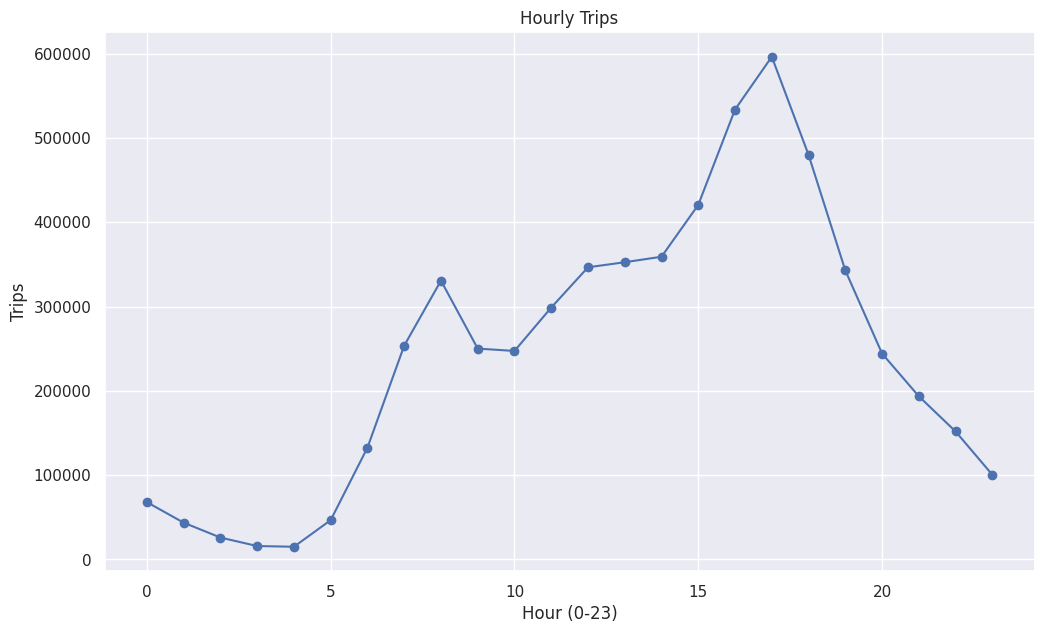

In [21]:
trips_per_hour = df_clean['hour'].value_counts().sort_index()
print(trips_per_hour)
trips_per_hour.plot(kind='line', figsize=(12,7), marker='o', title="Hourly Trips")
plt.ylabel("Trips")
plt.xlabel("Hour (0-23)")

plt.savefig("trips_per_hour.png", dpi=300, bbox_inches='tight')

plt.show()

## 7. Member vs Casual Comparison

We compare members and casual users based on two aspects:
1.   **Total Trips**:
     Members contribute a significantly higher number of trips compared to casual riders. This reflects the regular commuting behaviour of members.
2.   **Average Trip Duration**:
     Casual rider tend to have longer trip duration than members. This suggests that casual users often ride for leisure or tourism, while members use bike mainly for commuting. The bar charts below highlight this differences clearly.






#### Total trips casual vs member

  member_casual  total_trips
0        casual      2145777
1        member      3707559


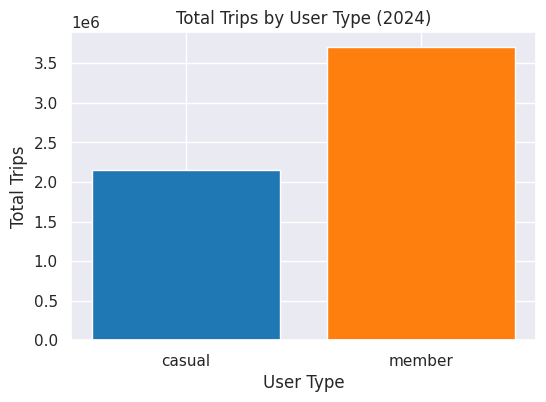

In [22]:
total_trips= df_clean.groupby('member_casual').size().reset_index(name='total_trips')
print(total_trips)

plt.figure(figsize=(6,4))
plt.bar(total_trips['member_casual'], total_trips['total_trips'], color=['#1f77b4','#ff7f0e'])
plt.title("Total Trips by User Type (2024)")
plt.xlabel("User Type")
plt.ylabel("Total Trips")

plt.savefig("Total_trips_by_user.png", dpi=300, bbox_inches='tight')

plt.show()


#### Average Trip Duration Casual vs Member

  member_casual  duration_min
0        casual     21.108979
1        member     12.228356


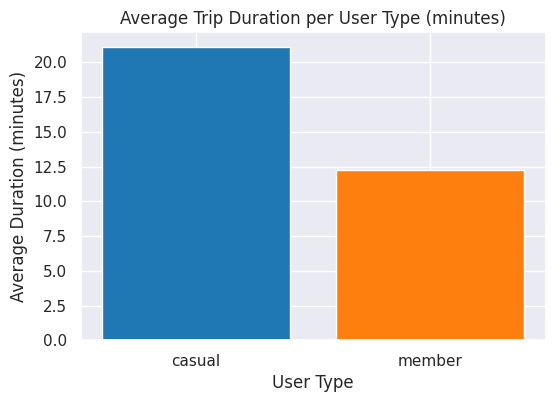

In [25]:
avg_duration = df_clean.groupby('member_casual')['duration_min'].mean().reset_index()
print(avg_duration)
plt.figure(figsize=(6,4))
plt.bar(avg_duration['member_casual'], avg_duration['duration_min'], color=['#1f77b4','#ff7f0e'])
plt.title("Average Trip Duration per User Type (minutes)")
plt.xlabel("User Type")
plt.ylabel("Average Duration (minutes)")

plt.savefig("Average_trip_duration_per_user_type.png", dpi=300, bbox_inches='tight')

plt.show()


## 8. Heatmap (Day vs Hour)

We generate a heatmap to visualize the intensity of rides across days days of the week and hours of the day.

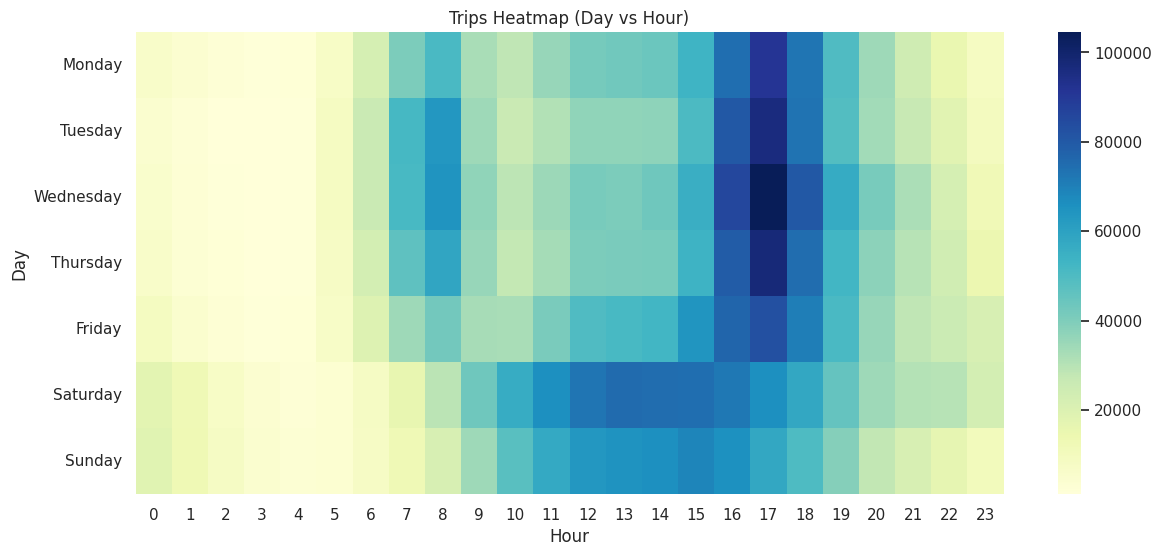

In [26]:
heatmap_data = df_clean.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0).reindex(order_days)
plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title("Trips Heatmap (Day vs Hour)")
plt.xlabel("Hour")
plt.ylabel("Day")

plt.savefig("Trips_Heatmap.png", dpi=300, bbox_inches='tight')

plt.show()

## 9. Preparing Summary  Datasets for Tableau

We export three summary datasets:
- 'monthly_summary.csv' ➡ trips per month
- 'member_summary.csv' ➡ member vs casual comparison
- 'heatmap_summary.csv' ➡ rides by day and hour

These datasets are ready to be used in Tableau for interactive dashboards.

In [ ]:
monthly_summary = df_clean.groupby('month', observed=False).size().reset_index(name='total_trips')

month_map = {
    "January":1, "February":2, "March":3, "April":4, "May":5, "June":6, "July":7, "August":8, "September":9,
    "October":10, "November":11, "December":12
}

monthly_summary['month_num'] = monthly_summary['month'].map(month_map)

monthly_summary = monthly_summary.sort_values('month_num')

monthly_summary.to_csv("monthly_summary.csv", index=False)

print(monthly_summary.head())

      month  total_trips month_num
0   January       144585         1
1  February       222846         2
2     March       301291         3
3     April       414546         4
4       May       608880         5


In [ ]:
member_summary = df_clean.groupby('member_casual').agg(
    total_trips = ('ride_id', 'count'),
    avg_duration = ('duration_min', 'mean')
).reset_index()

member_summary.to_csv("member_summary.csv", index=False)

print(member_summary.head())

  member_casual  total_trips  avg_duration
0        casual      2145777     21.108979
1        member      3707559     12.228356


In [ ]:
heatmap_summary = df_clean.groupby(['day_of_week', 'hour']).size().reset_index(name='total_trips')

heatmap_summary.to_csv("heatmap_summary.csv", index=False)

print(heatmap_summary.head())


  day_of_week  hour  total_trips
0      Friday     0         8955
1      Friday     1         5016
2      Friday     2         2870
3      Friday     3         1812
4      Friday     4         2052


In [ ]:
from google.colab import files
files.download('monthly_summary.csv')
files.download('member_summary.csv')
files.download('heatmap_summary.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Conclusion

1.   Seasonality: Trip volume shows a clear seasonal pattern, peaking during summer months (July–August) and reaching the lowest level in winter (January–February).
2.   User Type Differences:
*   Members consistently contribute more trips across the year.
*   Casual riders, however, take longer trips on average.
3.   **Behavior by Weekday**: Members dominate on weekdays, consistent with commuting usage. Casual riders are more active on weekends, suggesting leisure or tourism use.
4.   Business Implications: These findings suggest that operational planning (bike rebalancing, fleet allocation) should consider seasonal demand, while marketing strategies should target casual riders in summer and reinforce loyalty programs for members year-round.